In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
path_first = '/content/drive/My Drive/UFPI_NCAD_IoT_Attacks/data_raw/splits/first_dataset.csv'
first_dataset = pd.read_csv(path_first)
path_second = '/content/drive/My Drive/UFPI_NCAD_IoT_Attacks/data_raw/splits/second_dataset.csv'
second_dataset = pd.read_csv(path_second)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,17,18,19,20,21,22,23,25,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,15,16,18,19,20,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
correOne = first_dataset.corr()
correTwo = second_dataset.corr()

In [6]:
correOne

,ipv6.plen,ipv6.nxt,tcp.srcport,tcp.dstport,frame.len,frame.number,mqtt.kalive,mqtt.willmsg
ipv6.plen,1.000000,-0.017090,0.275488,-0.388581,1.000000,0.192611,-0.016409,NaN
ipv6.nxt,-0.017090,1.000000,NaN,NaN,-0.017090,-0.024813,NaN,NaN
tcp.srcport,0.275488,NaN,1.000000,-0.949253,0.275488,-0.044350,-0.251209,NaN
tcp.dstport,-0.388581,NaN,-0.949253,1.000000,-0.388581,-0.050625,NaN,NaN
frame.len,1.000000,-0.017090,0.275488,-0.388581,1.000000,0.192611,-0.016409,NaN
frame.number,0.192611,-0.024813,-0.044350,-0.050625,0.192611,1.000000,-0.003324,NaN
mqtt.kalive,-0.016409,NaN,-0.251209,NaN,-0.016409,-0.003324,1.000000,NaN
mqtt.willmsg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Important
def nan_counter(dataframe):
  nan_counts = {}
  for column in dataframe.columns:
    nan_counts[column] = dict(dataframe[column].isna().value_counts())
  return nan_counts
nan_counter(df_concat)

{'eth.dst': {False: 1015645},
 'eth.src': {False: 1015645},
 'frame.len': {False: 1015645},
 'frame.number': {False: 1015645},
 'frame.time_delta': {False: 1015645},
 'frame.time_epoch': {False: 670052, True: 345593},
 'frame.time_relative': {False: 670052, True: 345593},
 'ipv6.dst': {False: 1015645},
 'ipv6.nxt': {False: 1015645},
 'ipv6.plen': {False: 1015645},
 'ipv6.src': {False: 1015645},
 'label': {False: 1015645},
 'mqtt.clientid': {False: 585, True: 1015060},
 'mqtt.dupflag': {False: 460661, True: 554984},
 'mqtt.hdrflags': {False: 571952, True: 443693},
 'mqtt.kalive': {False: 3218, True: 1012427},
 'mqtt.len': {False: 571952, True: 443693},
 'mqtt.msg': {False: 402834, True: 612811},
 'mqtt.msgid': {False: 212393, True: 803252},
 'mqtt.msgtype': {False: 571952, True: 443693},
 'mqtt.passwd': {False: 2886, True: 1012759},
 'mqtt.qos': {False: 460661, True: 554984},
 'mqtt.retain': {False: 460661, True: 554984},
 'mqtt.topic': {False: 461306, True: 554339},
 'mqtt.topic_len': 

In [9]:
df_concat = pd.concat([first_dataset, second_dataset])

nan_first = nan_counter(first_dataset)
nan_second = nan_counter(second_dataset)
nan_final = nan_counter(df_concat)
corre_final = df_concat.corr()
corre_final

,ipv6.plen,ipv6.nxt,tcp.srcport,tcp.dstport,frame.len,frame.number,mqtt.kalive,mqtt.willmsg
ipv6.plen,1.000000,-0.077343,0.239248,-0.342250,1.000000,-0.029778,-0.041068,NaN
ipv6.nxt,-0.077343,1.000000,NaN,NaN,-0.077343,0.216727,NaN,NaN
tcp.srcport,0.239248,NaN,1.000000,-0.956167,0.239248,0.007598,-0.409065,NaN
tcp.dstport,-0.342250,NaN,-0.956167,1.000000,-0.342250,0.009210,NaN,NaN
frame.len,1.000000,-0.077343,0.239248,-0.342250,1.000000,-0.029778,-0.041068,NaN
frame.number,-0.029778,0.216727,0.007598,0.009210,-0.029778,1.000000,-0.385293,NaN
mqtt.kalive,-0.041068,NaN,-0.409065,NaN,-0.041068,-0.385293,1.000000,NaN
mqtt.willmsg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Padrão esquisito
dstport = np.array(df_concat['tcp.dstport'].isna())
srcport = np.array(df_concat['tcp.srcport'].isna())

comparisson = np.where(dstport == srcport, dstport, srcport)

true_corr = np.count_nonzero(comparisson == True)
false_corr = np.count_nonzero(comparisson == False)

# False and true counts of dstport and srcport
tc_dst = np.count_nonzero(dstport == True)
tc_src = np.count_nonzero(srcport == True)
fc_dst = np.count_nonzero(dstport == False)
fc_src = np.count_nonzero(srcport == False)

print('Comparisson true:', true_corr,
      '\nComparisson false:', false_corr,
      '\ndstport true:', tc_dst,
      '\ndstport false:', fc_dst,
      '\nsrcport true:', tc_src,
      '\nsrcport false:', fc_src,
      '\nsize dstport:', len(dstport),
      '\nsize srcport:', len(srcport),
      '\nproportion comparisson both:', true_corr/false_corr,
      '\nproportion dstport both:', tc_dst/fc_dst,
      '\nproportion srcport both:', tc_src/fc_src,
      '\nproportion comparisson true:', true_corr/len(comparisson),
      '\nproportion comparisson false:', false_corr/len(comparisson),
      '\npropotion dstport true:', tc_dst/len(dstport),
      '\npropotion dstport false:', fc_dst/len(dstport),
      '\npropotion srcport true:', tc_src/len(srcport),
      '\npropotion srcport false:', fc_src/len(srcport)
)

Comparisson true: 62507 
Comparisson false: 953138 
dstport true: 62507 
dstport false: 953138 
srcport true: 62507 
srcport false: 953138 
size dstport: 1015645 
size srcport: 1015645 
proportion comparisson both: 0.06558022028289713 
proportion dstport both: 0.06558022028289713 
proportion srcport both: 0.06558022028289713 
proportion comparisson true: 0.06154414189997489 
proportion comparisson false: 0.9384558581000251 
propotion dstport true: 0.06154414189997489 
propotion dstport false: 0.9384558581000251 
propotion srcport true: 0.06154414189997489 
propotion srcport false: 0.9384558581000251


Columns dstport is the destination port and srcport is the destination port used by the client. 

There is an obvious strong correlation between dst and src ports as we can see in the matrix of correlations: -0.956167.

We found 62507 of matching pairs of indexes whose have NaN, equals to the number of NaN values in dstport and srcport. 

We also find out that are so few NaN in these columns. But also enough to us train a furter model to predict what is the mising values.

In [107]:
# Vamos descobrir a proporção de ataques em dstport e srcport para conferir se corresponde
# à proporção de labels e identificar se o experimento segue os padrões de ataques ou está
# usando maneiras novas de promover um ataque # adicionar link sobre
# os ataques costumam ser em portas baixas de cliente, vamos verificar as dstport

# identifica características para melhor avaliar a credibilidade do expe como
# a diversidade de portas dst e src usadas e como isso afeta

dst_counts = df_concat['tcp.dstport'].value_counts()
min = df_concat['tcp.dstport'].min()
max = df_concat['tcp.dstport'].max()
amp = max - min

mean = df_concat['tcp.dstport'].mean()
std = df_concat['tcp.dstport'].std()
mode = df_concat['tcp.dstport'].mode()
median = df_concat['tcp.dstport'].median()

src_counts = df_concat['tcp.srcport'].value_counts()
src_min = df_concat['tcp.srcport'].min()
src_max = df_concat['tcp.srcport'].max()
src_amp = src_max - src_min

src_mean = df_concat['tcp.srcport'].mean()
src_std = df_concat['tcp.srcport'].std()
src_mode = df_concat['tcp.srcport'].mode()
src_median = df_concat['tcp.srcport'].median()

cv_srcport = src_std/src_mean
cv_dstport = std/mean

dstcounts_df = dst_counts.rename_axis('ports').reset_index(name='counts')

tmp = dstcounts_df['counts'] == 1 # tmp = dstcounts_df['counts'].value_counts() == 1
unique = tmp.value_counts()[True] # número de portas usadas só uma vez

print('Max dstport value:', max, '. Min dstport value:', min,". Amplitude:",amp,". Mode:",mode,
      "\nMean of dstport values:", "{:.2f}".format(mean),". Standart deviation of dstport values:", "{:.2f}".format(std),". Median: ", median,

      '\n\nMax srcport value:', "{:.2f}".format(src_max), '. Min srcport value:', "{:.2f}".format(src_min),". Amplitude:",src_amp,". Mode:", src_mode,
      "\nMean of srcport values:", "{:.2f}".format(src_mean),". Standart deviation of srcport values:", "{:.2f}".format(src_std),". Median: ", src_median,

      "\n\nCoefficient of Variation from dstport:", "{:.2f}".format(cv_dstport)," from srcport:", "{:.2f}".format(cv_srcport),
      "\nNumber of ports used just one time:",unique)

Max dstport value: 62795.0 . Min dstport value: 1883.0 . Amplitude: 60912.0 . Mode: 0    1883.0
dtype: float64 
Mean of dstport values: 27751.49 . Standart deviation of dstport values: 26555.60 . Median:  1883.0 

Max srcport value: 62795.00 . Min srcport value: 1883.00 . Amplitude: 60912.0 . Mode: 0    1883.0
dtype: float64 
Mean of srcport values: 27902.81 . Standart deviation of srcport values: 26508.54 . Median:  34713.0 

Coefficient of Variation from dstport: 0.96  from srcport: 0.95 
Number of ports used just one time: 12


Tem muita porta diferente, o que indica uma variedade muito grande

Observe que como estamos falando de portas e são praticamente discretas ao contrário de números como preços, a média e o desvio padrão apenas são úteis para calcular os coeficientes

Poucas portas foram usadas uma só vez, é claro

O que significa que o experimento tem alguma fidelidade nesse quesito pois uma rede IoT real um número certamente finito de portas sob ataque terá várias portas de cliente usadas mais de uma vez, pelo princípio da casa dos pombos

<Figure size 432x288 with 0 Axes>

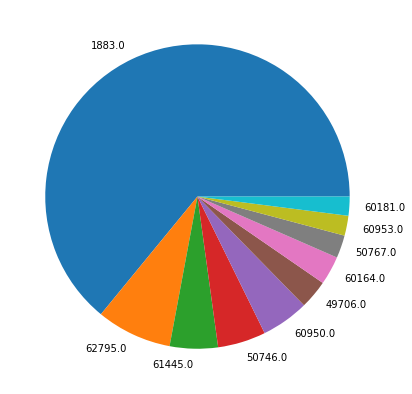

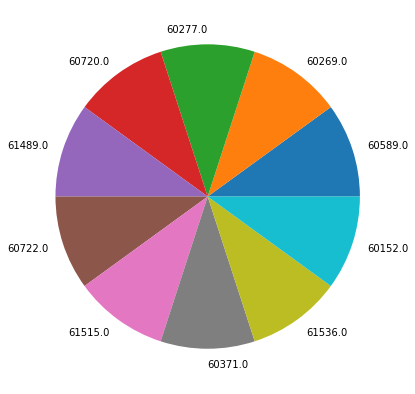

In [143]:
# Piechart portas mais e menos usadas e qtd
dstcounts_df = dst_counts.rename_axis('ports').reset_index(name='counts')

piechart_ports = np.unique(dstcounts_df['counts'].value_counts().to_numpy())

#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))

plt.figure(0)
ports0 = dstcounts_df['ports'][:10]
counts0 = dstcounts_df['counts'][:10]

fig0 = plt.figure(figsize =(10, 7)) 
plt.pie(counts0, labels = ports0) 

#ax1.pie(counts0,labels = ports0) #,colors = colors,autopct = '%1.1f%%')
#ax1.title('Most used ports')

plt.figure(1)
ports1 = dstcounts_df['ports'][dstcounts_df.shape[0]-10:]
counts1 = dstcounts_df['counts'][dstcounts_df.shape[0]-10:]
  
# Creating plot 
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(counts1, labels = ports1)

#ax2.pie(counts1,labels = ports1) #,colors = colors,autopct = '%1.1f%%')
#ax2.title('Few used ports')

# show plot 
plt.show() 

Acima temos dois gráficos mostrando a proporção da quantidade de vezes que uma porta foi usada. O gráfico acima mostra as mais usadas. A porta 1883 foi usada muitas vezes. O gráfico abaixo mostra as menos usadas.

In [ ]:
nan_counts

{'eth.dst': {False: 1015646},
 'eth.src': {False: 1015646},
 'frame.len': {False: 670481, True: 345165},
 'frame.number': {False: 810230, True: 205416},
 'frame.time_delta': {False: 1015646},
 'frame.time_epoch': {False: 1015646},
 'frame.time_relative': {False: 1015646},
 'ipv6.dst': {False: 956463, True: 59183},
 'ipv6.nxt': {False: 1015646},
 'ipv6.plen': {False: 1015646},
 'ipv6.src': {False: 956463, True: 59183},
 'label': {False: 670052, True: 345594},
 'mqtt.clientid': {False: 142482, True: 873164},
 'mqtt.dupflag': {False: 320913, True: 694733},
 'mqtt.hdrflags': {False: 571953, True: 443693},
 'mqtt.kalive': {False: 120410, True: 895236},
 'mqtt.len': {False: 430725, True: 584921},
 'mqtt.msg': {False: 427540, True: 588106},
 'mqtt.msgid': {False: 211492, True: 804154},
 'mqtt.msgtype': {False: 569806, True: 445840},
 'mqtt.passwd': {False: 142870, True: 872776},
 'mqtt.qos': {False: 461210, True: 554436},
 'mqtt.retain': {False: 461210, True: 554436},
 'mqtt.topic': {False: 3

In [ ]:
nan_first

{'eth.dst': {False: 670052},
 'eth.src': {False: 670052},
 'frame.len': {False: 670052},
 'frame.number': {False: 670052},
 'frame.time_delta': {False: 670052},
 'frame.time_epoch': {False: 670052},
 'frame.time_relative': {False: 670052},
 'ipv6.dst': {False: 670052},
 'ipv6.nxt': {False: 670052},
 'ipv6.plen': {False: 670052},
 'ipv6.src': {False: 670052},
 'label': {False: 670052},
 'mqtt.clientid': {False: 157, True: 669895},
 'mqtt.dupflag': {False: 320484, True: 349568},
 'mqtt.hdrflags': {False: 429628, True: 240424},
 'mqtt.kalive': {False: 2790, True: 667262},
 'mqtt.len': {False: 429628, True: 240424},
 'mqtt.msg': {False: 285215, True: 384837},
 'mqtt.msgid': {False: 211297, True: 458755},
 'mqtt.msgtype': {False: 429628, True: 240424},
 'mqtt.passwd': {False: 2692, True: 667360},
 'mqtt.qos': {False: 320484, True: 349568},
 'mqtt.retain': {False: 320484, True: 349568},
 'mqtt.topic': {False: 320581, True: 349471},
 'mqtt.topic_len': {False: 320581, True: 349471},
 'mqtt.use

In [ ]:
nan_second

{'eth.dst': {False: 345593},
 'eth.src': {False: 345593},
 'frame.len': {False: 345593},
 'frame.number': {False: 345593},
 'frame.time_delta': {False: 345593},
 'ipv6.dst': {False: 345593},
 'ipv6.nxt': {False: 345593},
 'ipv6.plen': {False: 345593},
 'ipv6.src': {False: 345593},
 'label': {False: 345593},
 'mqtt.clientid': {False: 428, True: 345165},
 'mqtt.dupflag': {False: 140177, True: 205416},
 'mqtt.hdrflags': {False: 142324, True: 203269},
 'mqtt.kalive': {False: 428, True: 345165},
 'mqtt.len': {False: 142324, True: 203269},
 'mqtt.msg': {False: 117619, True: 227974},
 'mqtt.msgid': {False: 1096, True: 344497},
 'mqtt.msgtype': {False: 142324, True: 203269},
 'mqtt.passwd': {False: 194, True: 345399},
 'mqtt.qos': {False: 140177, True: 205416},
 'mqtt.retain': {False: 140177, True: 205416},
 'mqtt.topic': {False: 140725, True: 204868},
 'mqtt.topic_len': {False: 140725, True: 204868},
 'mqtt.username': {False: 194, True: 345399},
 'mqtt.willmsg': {True: 345593},
 'mqtt.willtop

In [ ]:
nan_final

{'frame.time_epoch': {'False': 956462, 'True': 59183},
 'frame.time_relative': {'False': 956462, 'True': 59183},
 'ipv6.dst': {'False': 1012321, 'True': 3324},
 'ipv6.nxt': {'False': 1012321, 'True': 3324},
 'label': {'False': 670480, 'True': 345165},
 'mqtt.clientid': {'False': 810229, 'True': 205416},
 'mqtt.dupflag': {'False': 142481, 'True': 873164},
 'mqtt.hdrflags': {'False': 320912, 'True': 694733},
 'mqtt.kalive': {'False': 571952, 'True': 443693},
 'mqtt.len': {'False': 120409, 'True': 895236},
 'mqtt.msg': {'False': 430724, 'True': 584921},
 'mqtt.msgid': {'False': 427539, 'True': 588106},
 'mqtt.msgtype': {'False': 211491, 'True': 804154},
 'mqtt.passwd': {'False': 569805, 'True': 445840},
 'mqtt.qos': {'False': 142869, 'True': 872776},
 'mqtt.retain': {'False': 461209, 'True': 554436},
 'mqtt.topic': {'False': 461209, 'True': 554436},
 'mqtt.topic_len': {'False': 320775, 'True': 694870},
 'mqtt.username': {'False': 320581, 'True': 695064},
 'mqtt.willmsg': {'False': 2692, '

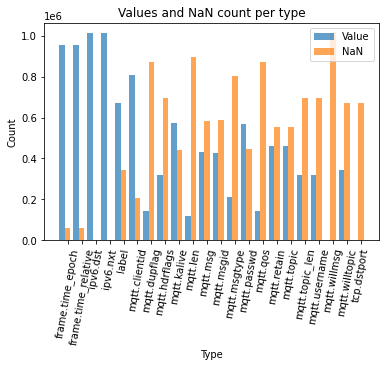

In [ ]:
# Barplot NaN

def plot_doublebar(dicte):
  grupos = len(dicte)
  
  false = [value['False'] for value in dicte.values()]
  true = [value['True'] for value in dicte.values()]
  fig, ax = plt.subplots()
  indice = np.arange(grupos)
  bar_larg = 0.4
  transp = 0.7
  plt.bar(indice, false, bar_larg, alpha=transp, label='Value')
  plt.bar(indice + bar_larg, true, bar_larg, alpha=transp, label='NaN')

  plt.xlabel('Type') 
  plt.ylabel('Count') 
  plt.title('Values and NaN count per type') 
  plt.xticks(indice + bar_larg, (list(dicte.keys())), rotation=80)
  plt.legend() 
  #plt.tight_layout() 
  plt.show()

plot_doublebar(nan_final)

In [ ]:
df_concat

,frame.time_delta,frame.time_epoch,frame.time_relative,ipv6.plen,ipv6.nxt,ipv6.src,ipv6.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.len,frame.number,mqtt.clientid,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.passwd,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.willmsg,mqtt.willtopic,label
0,0.000000000,1.573.757.292.769.270.000,0.000000000,68,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728.0,1883.0,60:01:94:0e:87:7a,68:a3:c4:6e:50:12,122,1,NaN,0,0x00000031,NaN,46,28.20,NaN,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/temperatura,39,NaN,NaN,NaN,normal
1,0.000023000,1.573.757.292.769.290.000,0.000023000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883.0,50728.0,68:a3:c4:6e:50:12,60:01:94:0e:87:7a,74,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.003886000,1.573.757.292.773.170.000,0.003909000,64,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728.0,1883.0,60:01:94:0e:87:7a,68:a3:c4:6e:50:12,118,3,NaN,0,0x00000031,NaN,42,34.70,NaN,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/umidade,35,NaN,NaN,NaN,normal
3,0.000010000,1.573.757.292.773.180.000,0.003919000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883.0,50728.0,68:a3:c4:6e:50:12,60:01:94:0e:87:7a,74,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,3.287.798.000,1.573.757.296.060.980.000,3.291.717.000,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe1c:2a5b,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,60066.0,1883.0,cc:50:e3:1c:2a:5b,68:a3:c4:6e:50:12,122,5,NaN,0,0x00000031,NaN,46,24.20,NaN,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node03/temperatura,39,NaN,NaN,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345588,0.000010000,NaN,NaN,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883.0,59172.0,68:a3:c4:6e:50:12,cc:50:e3:55:cd:91,74,1015642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
345589,10.003.192.000,NaN,NaN,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172.0,1883.0,cc:50:e3:55:cd:91,68:a3:c4:6e:50:12,122,1015643,NaN,0,0x00000031,NaN,46,25.70,NaN,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node01/temperatura,39,NaN,NaN,NaN,normal
345590,0.000023000,NaN,NaN,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883.0,59172.0,68:a3:c4:6e:50:12,cc:50:e3:55:cd:91,74,1015644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
345591,0.013353000,NaN,NaN,64,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172.0,1883.0,cc:50:e3:55:cd:91,68:a3:c4:6e:50:12,118,1015645,NaN,0,0x00000031,NaN,42,46.30,NaN,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node01/umidade,35,NaN,NaN,NaN,normal
